## Intoduction to Scikit-Learn(Sklearn)


- An end-to-end scikit learn workflow
- Getting the data ready
- Choose the right estimator/Ml model/algorithm
- Fit the model/estimator/algorithm and use it make predictions on our data
- Evaluating the model
- Improve the model
- Save and load tained model
- Putting it all together

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## An end-to-end Scikit-learn workflow

In [2]:
# get the data

heart_disease=pd.read_csv('dataset/heart-disease.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# create x (features matrix/independent variables) 
x=heart_disease.drop('target',axis=1)

#creating y(label/dependent variables)
y=heart_disease['target']

In [5]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

#for knowing the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
#splitting data into train_Set and test_Set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
len(x_train)

242

In [10]:
#fitting the train_set with the classifier
clf.fit(x_train,y_train);

In [11]:
# Making predictions using the model we've just trained
y_preds=clf.predict(x_test)

In [12]:
y_preds

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [13]:
# Evaluating the mode 
clf.score(x_train,y_train)

1.0

In [14]:
clf.score(x_test,y_test)

0.819672131147541

In [15]:
# Getting detailed information about precision of your model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [16]:
confusion_matrix(y_test,y_preds)

array([[20,  7],
       [ 4, 30]], dtype=int64)

In [17]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [18]:
# Improve a model
# Try the different amount of n_estimators (one of the default parameter)
np.random.seed(0)
for i in range(10,110,10):
    print(f'Trying model with {i} estimators')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f'Model Accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%')
    print()

Trying model with 10 estimators
Model Accuracy on test set: 77.05%

Trying model with 20 estimators
Model Accuracy on test set: 80.33%

Trying model with 30 estimators
Model Accuracy on test set: 77.05%

Trying model with 40 estimators
Model Accuracy on test set: 80.33%

Trying model with 50 estimators
Model Accuracy on test set: 81.97%

Trying model with 60 estimators
Model Accuracy on test set: 81.97%

Trying model with 70 estimators
Model Accuracy on test set: 81.97%

Trying model with 80 estimators
Model Accuracy on test set: 80.33%

Trying model with 90 estimators
Model Accuracy on test set: 83.61%

Trying model with 100 estimators
Model Accuracy on test set: 80.33%



In [19]:
# Save the model and load it

import pickle
pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [20]:
loaded_model=pickle.load(open('random_forest_model_1.pkl','rb'))

loaded_model.score(x_test,y_test)

0.8032786885245902

## 1. Getting our data ready to be used with ml

Three main things we have to do:
    - Split the data into features and labels (usually x and y)
    - Converting non numericals values into numerical values (feature encoding)
    - Filling (also called imputing ) missing values

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
x= heart_disease.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 1.1- Spliting data into training and test sets

In [24]:
# In the machine learning one of the most fundamental principal is
# never elvaluate or test your model on data that it is learn from
# that's why we are splitting into training an test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### 1.2- Make sure all data is numerical

In [25]:
car_sales=pd.read_csv('dataset/car-sales-extended.csv')

In [26]:
len(car_sales)

1000

In [66]:
# split x and y
x=car_sales.drop('Price',axis=1)
y=car_sales['Price']

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [68]:

# Build machine learning model

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()

# model.fit(x_train,y_train)
# model.score(x_test,y_test)

#machine learning model can only deal with numerical data

In [69]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [70]:
# First way to convert categorical attributes into numerical attributes

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',
                               one_hot,
                                categorical_features
                               )],
                             remainder='passthrough'
                             )
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [72]:

# Let's try refit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)

# setting up new the training and test data
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

# fitting the model
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
model.score(x_test,y_test)

0.3235867221569877

In [74]:
model.score(x_train,y_train)

0.891612713353635

In [77]:
# Another way for converting categorical data into numerical

# split x and y
x=car_sales.drop('Price',axis=1)
y=car_sales['Price']

#encoding
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies.head()

categorical_features=['Colour']

# create training and test set
#from sklearn.model_selection import train_test_split
#x_train,y_train,

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [80]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

np.random.seed(42)

# setting up new the training and test data
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

# fitting the model
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
model.score(x_test,y_test)

0.3235867221569877

In [82]:
model.score(x_train,y_train)

0.891612713353635

### What if there were missing values ?

- Fill them with some values (also known as imputation)
- Remove the samples with missing data altogether

In [113]:
# import the dataset with missing values
car_sales_missing=pd.read_csv('dataset/car-sales-extended-missing-data.csv')
car_sales_missing.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0


In [114]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [115]:
# Lets try to encode data with missing values

# x=car_sales_missing.drop('Price',axis=1)
# y=car_sales_missing['Price']

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features=['Make','Colour','Doors']
# one_hot=OneHotEncoder()
# transformer=ColumnTransformer([('one_hor',one_hot,categorical_features)],
#                            remainder='passthrough')
# transformed_x=transformer.fit_transform(x)
# tranformed_x

Above code will show error due to missing values

#### Option 1: Fill mising data with Pandas

In [116]:
# Fill the "Make" column
car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the "Colour" column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the "Odometer (Km)" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'
                                                           ].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing['Doors'].fillna(4,inplace=True)

In [117]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [118]:
# remove the rows with missing price value
car_sales_missing.dropna(axis=0,inplace=True)

In [119]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [120]:
# split x and y
x=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

#x['Odometer (KM)'] = x['Odometer (KM)'].astype('int')
#x['Doors'] = x['Doors'].astype('int')

#encoding the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],
                             remainder='passthrough')

transformed_x=transformer.fit_transform(x)

transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [121]:
pd.DataFrame(transformed_x.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


#### Option 2: Fill missing values with scikit-learn

In [122]:
car_sales_missing=pd.read_csv('dataset/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [123]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [125]:
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [126]:
# filling missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numericals values with mean 
# if the strategy is constant you have to pass fill_value
# this is saying over the categorical columns constantly fill them, if you find the missing value fill them with 'missing'
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
categorical_features = ['Make','Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# create an imputer (something that fills missing data)
# ColumnTransformer - Applies transformers to columns of an array or pandas DataFrame.
imputer = ColumnTransformer([
    ('categorical_imputer',categorical_imputer,categorical_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_feature)
])

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [127]:
car_sales_filled = pd.DataFrame(filled_x, columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [128]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [129]:
# let's try convert our data into numbers


# Turn the strings/categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [130]:
pd.DataFrame(transformed_x.toarray()).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [131]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()

x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22011714008302485

In [132]:
model.score(x_train,y_train)

0.8847250887037676

### 2.1 Picking a  machine learning model for a regression problem

In [18]:
# We are going to use one of scikit learning built in dataset
# Import Boston housing dataset

from sklearn.datasets import load_boston

boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
type(boston)

sklearn.utils.Bunch

In [19]:
# Converting dictionary into Dataframe
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
len(boston_df)

506

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

In [12]:
# Let's try Ridge regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create a data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

# Split into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x_train,y_train)

# Check the score
model.score(x_test,y_test)

0.6662221670168518

How do we improve this score ?

What is Ridge is not working ? 

Refer the scikit learn map .

In [15]:
# lets try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# Create a data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

# Split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit the model
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

# Evaluate the model 
regressor.score(x_test,y_test)

0.873969014117403

## 2.2 Picking a ml model for classification problem

Follow the map

In [3]:
import pandas as pd
import numpy as np

heart_disease=pd.read_csv('dataset/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(heart_disease)

303

In [6]:
# Lets try Linear Support Vector Classification

from sklearn.svm import LinearSVC

# Setup random seed value 
np.random.seed(42)

# create data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Split data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit the model
model=LinearSVC(max_iter=250000)
model.fit(x_train,y_train)

# Evaluate the model
model.score(x_test,y_test)

C:\Users\Baraka\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8852459016393442

In [7]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Split into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Fit the model
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

#Evaluate the model
classifier.score(x_test,y_test)

0.8524590163934426

Tidbit:
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data , use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it make predictions
#### 3.1 Fitting the model to the data

Different names for :

- x=features , features variable , data
- y=labels,targets,target variables

In [8]:
# Random Forest classifier
# Import randomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(100)

x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

classifier.score(x_test,y_test)

0.8387096774193549

## 3.2 Make predictions using ml model

2 ways to make predictions

- predict()
- predict_proba()

In [15]:
## prediction using predict()

In [11]:
x_test.ndim,x_test.shape

(2, (31, 13))

In [12]:
classifier.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [13]:
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [14]:
y_preds = classifier.predict(x_test)
np.mean(y_preds == y_test)

0.8387096774193549

Make predictions using predict_proba()

In [16]:
# predict_proba() returns probabilities of a classification label
# it returns the probability of that label is being true
# ex. for 1st 0 => 0.89, 1=> 0.11 that's why result i 0
# threshold id 0.5
classifier.predict_proba(x_test[:5])

array([[0.24, 0.76],
       [0.86, 0.14],
       [0.87, 0.13],
       [0.01, 0.99],
       [0.26, 0.74]])

In [17]:
classifier.predict(x_test[:5])

array([1, 0, 0, 1, 1], dtype=int64)

predict() can also be used for regression models

In [21]:
# import the model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(50)

# create data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

# split data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
regressor=RandomForestRegressor()

# fit the data into model
regressor.fit(x_train,y_train)

# evaluating the model on training data
regressor.score(x_test,y_test)

0.9154870829784474

In [22]:
# Making prediction
y_preds=regressor.predict(x_test)
y_preds[:5]

array([23.028, 22.226, 20.481, 23.92 , 23.854])

In [23]:
np.array(y_test[:5])

array([27.5, 21.6, 17.7, 24.3, 22.2])

In [24]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

1.8418235294117657

## 4. Evaluating machine learning model
#### Three ways to evaluate model/estimators

- Estimator score method
- The scoring parameter
- Problem-specific metric function

### 4.1 Evaluating a model with the score method

In [26]:
# import the dataset
heart_disease=pd.read_csv('dataset/heart-disease.csv')

# import the model
from sklearn.ensemble import RandomForestClassifier

# Create x & y data
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split the data into train & test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate the model
model = RandomForestClassifier()

# Fit the model to data
model.fit(x_train,y_train);

In [27]:
model.score(x_test,y_test)

0.7868852459016393

### 4.2 Evaluating a model with the scoring parameter

In [30]:
from sklearn.model_selection import cross_val_score

# Import the data set
heart_disease=pd.read_csv('dataset/heart-disease.csv')

# Import the model
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create x and y data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the model
model=RandomForestClassifier()

# Fitting the data
model.fit(x_train,y_train);


In [31]:
# score ()
model.score(x_test,y_test)

0.8524590163934426

cross validation aims to solve the problem of not training on all the data.So we're creating five models and we end up having a model trained on all of the data and avoiding getting lucky scores.

In [32]:
cross_val_score(model,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [33]:
np.random.seed(42)

# Single training and test split score
model_single_score=model.score(x_test,y_test)

#Take the mean of 5-fols cross-validation score
model_cross_val_score=np.mean(cross_val_score(model,x,y))

# Compare the two
model_single_score,model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [34]:

# default scoring parameter of classifier = mean accuracy
model.score(x_test,y_test)

0.8524590163934426

In [35]:
# Scorring parameter is set to none by default
cross_val_score(model,x,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

- Accuracy
- Area under ROC curve
- Confusion Matrix
- Classification report

In [36]:
# Import the model and score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Set up a random seed
np.random.seed(42)

# Create x and y data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Instantiate the model
classifier=RandomForestClassifier()

# Cross val check
cross_val_score=cross_val_score(model,x,y)


In [37]:
np.mean(cross_val_score)

0.8248087431693989

In [38]:
print(f'Heart disease classifier cross-validated accuracy {np.mean(cross_val_score)*100:.2f}%')

Heart disease classifier cross-validated accuracy 82.48%


### Area under the receiver operating characteristics (AUC/ROC) 

* Area under curve
* Roc curve

ROC curves are a comparison of a model's true positive rate (tpr) vs model's false positive rate (fpr)

- True positive - model predicts 1 when truth is 1
- False positive - model predicts 1 when truth is 0
- True negative - model predicts 0 when truth is 0
- False negative - model predicts 0 when truth is 1

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset
heart_disease=pd.read_csv('dataset/heart-disease.csv')

# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Setup the seed
np.random.seed(42)

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Fitting the data into model
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

# Import the roc_curve
from sklearn.metrics import roc_curve

# Predicting the values
y_pred=classifier.predict_proba(x_test)
y_preds=classifier.predict(x_test)
y_pred[:5]
classifier.score(x_test,y_test)

0.8524590163934426

In [4]:
y_probs_positive=y_pred[:,1]
y_probs_positive[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [5]:
# Calculate the fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

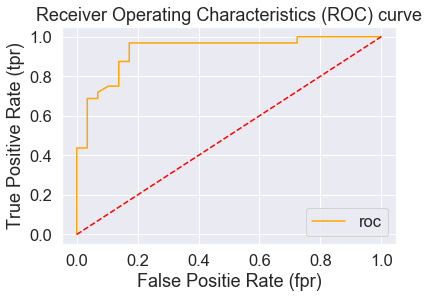

In [6]:
# Create a function to plot ROC curves for better understanding
def plot_roc_curve(fpr,tpr):
    # Plot the roc curve
    plt.plot(fpr,tpr,color='orange',label='roc')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    # customize the plot
    plt.xlabel('False Positie Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [7]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

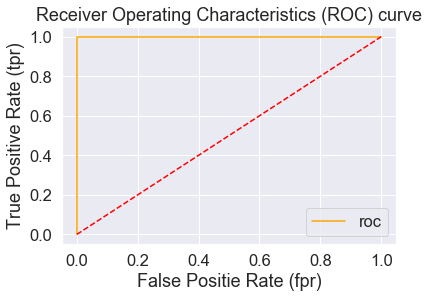

In [8]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [9]:
fpr

array([0., 0., 1.])

In [10]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

### Confusion Matrix

A confusion Matrix is a quick way to compare the label that a model predicts and the actual labels it was supposed to predict.

In [11]:
from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [12]:
# Visualizing the confusion matrix with pd.crosstabs
pd.crosstab(y_test,
           y_pred,
           rownames=['Actual labels'],
           colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


In [40]:
# Installing any package within jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.1
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Baraka\Desktop\sample_project_1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       he774522_0         4.8 MB
    seaborn-0.10.0             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1e-he774522_0 --> 1.1.1f-he774522_0




openssl-1.1.1f       | 4.8 MB    |            |   0% 
openssl-1.1.1f       | 4.8 MB    |            |   0% 
openssl-1.1.1f       | 4.8 MB    | 2          |   3% 
openssl-1.1.1f       | 4.8

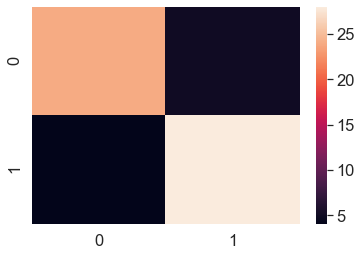

In [13]:
# Make our confusion matrix more visual with seaborn's heatmap()
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the font_scale
sns.set(font_scale=1.5)

# Create a confusion matix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot using Seaborn
sns.heatmap(conf_mat);

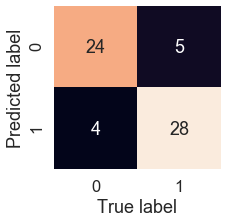

In [14]:
def plot_conf_map(conf_mat):
    '''
    Plots a confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False
                    )
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    
plot_conf_map(conf_mat)